In [158]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [159]:
variation ={}

# Static functions

In [160]:
def evaluate_Algo(df):
    sp_clus_pts_dict ={"Gentoo":[],"Chinstrap":[],"Adelie":[]}
    for sp in sp_clus_pts_dict:
        sp_clusters_assign = df[df.species == sp].cluster.unique()
        # print(f"For species {sp} :")
        for clus in sp_clusters_assign:
            pts_in_cluster = df[(df.species == sp)&(df.cluster == clus)].cluster.count()
            sp_clus_pts_dict[sp].append((clus,pts_in_cluster))

    return sp_clus_pts_dict

# Explore penguins Dataset

In [161]:
peng_df = sns.load_dataset("penguins")
peng_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


## Clean peng_df

In [162]:
peng_c_df = peng_df.copy()

In [163]:
peng_c_df.shape

(344, 7)

In [164]:
# drop un-relevent features
peng_c_df = peng_c_df.drop(["island","sex"],axis=1)

In [165]:
peng_c_df = peng_c_df.dropna()


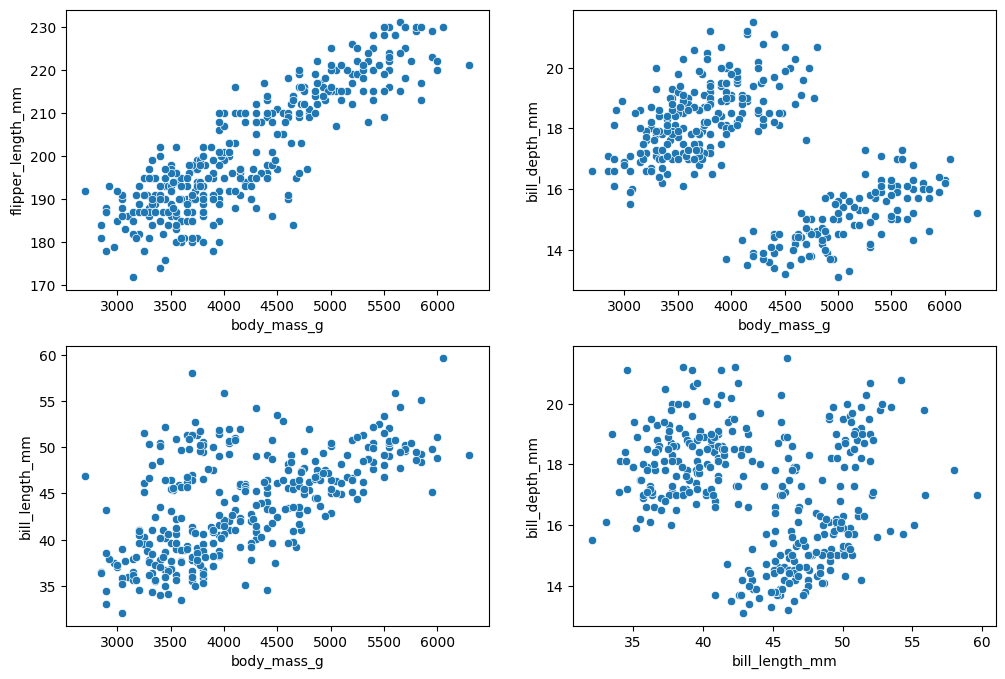

In [166]:
fig, ax = plt.subplots(2,2,figsize=(12, 8))
sns.scatterplot(data=peng_c_df, x='body_mass_g', y='flipper_length_mm',ax=ax[0,0])
sns.scatterplot(data=peng_c_df, x='body_mass_g', y='bill_depth_mm',ax=ax[0,1])
sns.scatterplot(data=peng_c_df, x='body_mass_g', y="bill_length_mm",ax=ax[1,0])
#sns.scatterplot(data=peng_c_df, x='body_mass_g', y="body_mass_g",ax=ax[1,1])
sns.scatterplot(data=peng_c_df, x='bill_length_mm', y="bill_depth_mm",ax=ax[1,1])
plt.show()

#choosing the right features to consider can affect highly the created clusters
# example : if choose only body_mass_g and bill_depth_mm.. we can end up with having 2 cluster and not 3

# Analyze Variations
- features to consider (bill_length_mm ,bill_depth_mm  ,flipper_length_mm  ,body_mass_g)
- number of clusters --> k=3
- Transformer to use (MinMax,std,robust,quantile,power...)

## Considering bill_length_mm ,bill_depth_mm 

In [167]:
# from sklearn import preprocessing,cluster
# from sklearn.metrics import silhouette_score,silhouette_samples,pairwise_distances
# def evaluate_kmean_allscalers(df,k_val,scaler):
#     scalers={
#         "StandardScaler":preprocessing.StandardScaler(),
#         "MinMaxScaler" : preprocessing.MinMaxScaler(),
#         "RobustScaler" : preprocessing.RobustScaler(),
#         "quantileT":preprocessing.QuantileTransformer(n_quantiles=df.shape[0]),
#         "QuantileTransformer":preprocessing.PowerTransformer()
#     }
#     if scaler in scalers:
#         my_scaler = scalers[scaler].set_output(transform='pandas')
#         df_scaled_df = my_scaler.fit_transform(df)
#         # let's see the first 5 observations after normalising the data
#         my_model = cluster.KMeans(n_clusters=k_val,n_init=10)
#         my_model.fit(df_scaled_df)
#         inertia = my_model.inertia_
#         score = silhouette_score(df_scaled_df,my_model.labels_)
#         peng_cf_df["cluster"] = my_model.predict(df_scaled_df)
#         # variation[scaler +",allfeatures"] = evaluate_Algo(peng_c_df)
#     else:
#         print("wrong scaler given")
        
#     return(inertia,score)


In [168]:
peng_cf_df = peng_c_df.drop(["species","body_mass_g","flipper_length_mm"],axis=1).copy()

In [169]:
from sklearn import preprocessing,cluster
from sklearn.metrics import silhouette_score,silhouette_samples,pairwise_distances
inertia_l =[]
sill_l = []
centroid_l=[]
my_scaler = preprocessing.StandardScaler().set_output(transform='pandas')
df_scaled_df = my_scaler.fit_transform(peng_cf_df)

peng_p_df = df_scaled_df.copy()

In [170]:
for k_value in range (2,10):
        
        my_model = cluster.KMeans(n_clusters=k_value,n_init=10)
        my_model.fit(df_scaled_df)

        score = silhouette_score(df_scaled_df,my_model.labels_)
        inertia_l.append(my_model.inertia_)
        sill_l.append(score)

        centroid_df = pd.DataFrame(my_model.cluster_centers_)
        centroid_df.columns = ['bill_length_mm','bill_depth_mm']
        centroid_l.append(centroid_df)

        peng_p_df["cluster_"+str(k_value)] = my_model.predict(df_scaled_df)


In [171]:
peng_p_df

,bill_length_mm,bill_depth_mm,cluster_2,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8,cluster_9
0,-0.884499,0.785449,0,2,3,3,0,6,4,1
1,-0.811126,0.126188,0,2,0,1,5,0,1,3
2,-0.664380,0.430462,0,2,0,1,5,6,4,1
4,-1.324737,1.089724,0,2,3,3,0,6,4,8
5,-0.847812,1.748985,0,2,3,3,0,3,2,4
...,...,...,...,...,...,...,...,...,...,...
338,0.601305,-1.750171,1,1,1,4,1,1,3,6
340,0.527932,-1.445897,1,1,1,4,1,1,3,5
341,1.188289,-0.735923,1,1,1,0,3,5,7,0
342,0.234440,-1.192335,1,1,1,4,1,1,3,5


In [172]:
centroid_l[0]

,bill_length_mm,bill_depth_mm
0,-0.896728,0.594082
1,0.779124,-0.516169


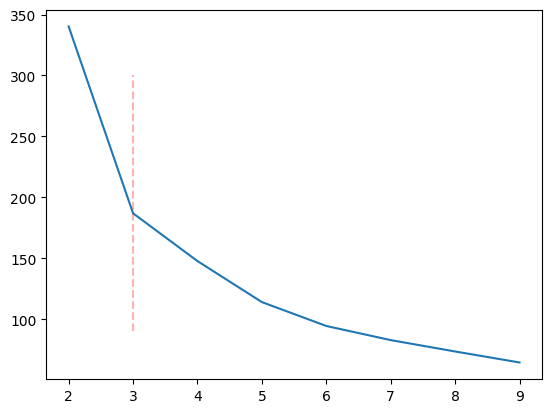

In [173]:
sns.lineplot(x=range (2,10),y=inertia_l)
plt.vlines(x=3,ymin=90,ymax=300,colors="red",linestyles="dashed",alpha=0.3);

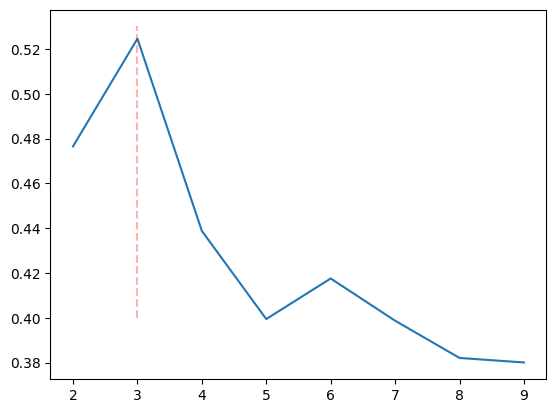

In [174]:
sns.lineplot(x=range (2,10),y=sill_l)
plt.vlines(x=3,ymin=0.4,ymax=0.53,colors="red",linestyles="dashed",alpha=0.3);

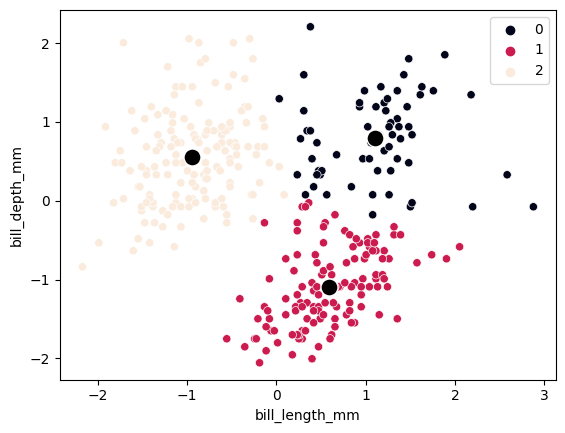

In [175]:
sns.scatterplot(data=peng_p_df,x="bill_length_mm",y="bill_depth_mm",hue="cluster_3",palette="rocket")
sns.scatterplot(data=centroid_l[1], x='bill_length_mm', y='bill_depth_mm', color='black',s=150);


<AxesSubplot:xlabel='bill_length_mm', ylabel='bill_depth_mm'>

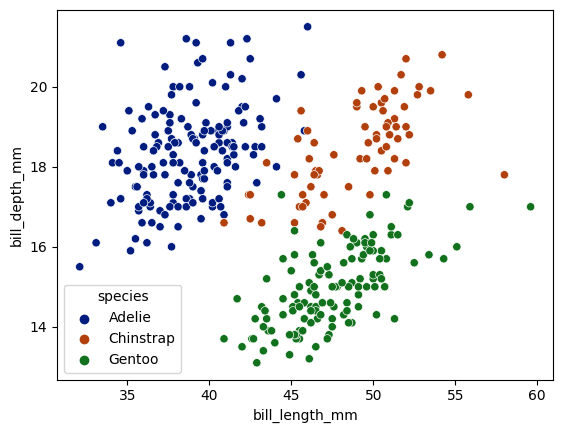

In [176]:
sns.scatterplot(data=peng_c_df,x="bill_length_mm",y="bill_depth_mm",hue="species",palette="dark")

## For fixed K =3

In [177]:
my_scaler = preprocessing.StandardScaler().set_output(transform='pandas')
df_scaled_df = my_scaler.fit_transform(peng_cf_df)

#peng_p_df = df_scaled_df.copy()
my_model = cluster.KMeans(n_clusters=3,n_init=10)
my_model.fit(df_scaled_df)

score = silhouette_score(df_scaled_df,my_model.labels_)

centroid_df = pd.DataFrame(my_model.cluster_centers_)
centroid_df.columns = ['bill_length_mm','bill_depth_mm']

df_scaled_df["cluster"] = my_model.labels_

In [178]:
df_scaled_df

,bill_length_mm,bill_depth_mm,cluster
0,-0.884499,0.785449,0
1,-0.811126,0.126188,0
2,-0.664380,0.430462,0
4,-1.324737,1.089724,0
5,-0.847812,1.748985,0
...,...,...,...
338,0.601305,-1.750171,1
340,0.527932,-1.445897,1
341,1.188289,-0.735923,1
342,0.234440,-1.192335,1


In [179]:
df_scaled_df.cluster.unique()

array([0, 2, 1])

# Create uniform clustered df to test Kmean

In [180]:
import math
import random
x_l=[]
y_l=[]
R=5
centerX =7
centerY =7
for i in range(500):
    r = R * math.sqrt(random.random())
    theta = random.random() * 2 * math.pi
    x = centerX + r * math.cos(theta)
    y = centerY + r * math.sin(theta)
    x_l.append(x)
    y_l.append(y)
    
for i in range(500):
    r = R * math.sqrt(random.random())
    theta = random.random() * 2 * math.pi
    x = 15 + r * math.cos(theta)
    y = 15 + r * math.sin(theta)
    x_l.append(x)
    y_l.append(y)

for i in range(500):
    r = R * math.sqrt(random.random())
    theta = random.random() * 2 * math.pi
    x = 5 + r * math.cos(theta)
    y = 20 + r * math.sin(theta)
    x_l.append(x)
    y_l.append(y)

<AxesSubplot:>

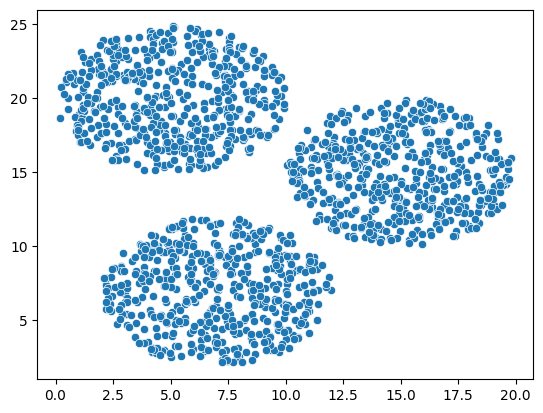

In [181]:
sns.scatterplot(x=x_l,y=y_l)

In [182]:
test_df = pd.DataFrame({"x": x_l, 'y': y_l})

In [183]:
std_scaler = preprocessing.StandardScaler().set_output(transform="pandas")
scaled_data_df= std_scaler.fit_transform(test_df)
scaled_p_df = scaled_data_df.copy()

<AxesSubplot:>

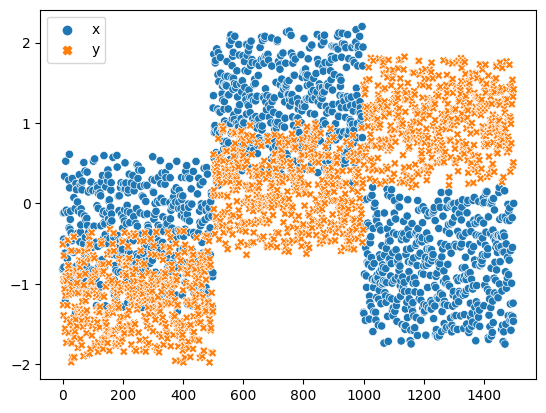

In [151]:
sns.scatterplot(scaled_data_df)

In [184]:
inertia_l =[]
sill_l=[]
centroid_l=[]


for k_value in range (2,10):
        
        
        my_model = cluster.KMeans(n_clusters=k_value,n_init=10)
        my_model.fit(scaled_data_df)
        score = silhouette_score(scaled_data_df,my_model.labels_)
        inertia_l.append(my_model.inertia_)
        sill_l.append(score)

        centroid_df = pd.DataFrame(my_model.cluster_centers_)
        centroid_df.columns = ['x','y']
        centroid_l.append(centroid_df)

        scaled_p_df["cluster_"+str(k_value)] = my_model.labels_



<AxesSubplot:>

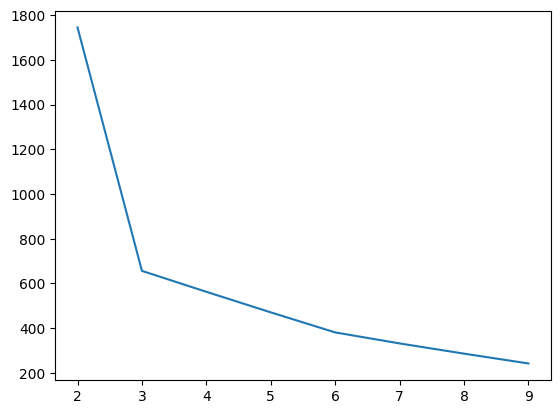

In [185]:
sns.lineplot(x=range (2,10,1),y=inertia_l)
#plt.vlines(x=3,ymin=90,ymax=300,colors="red",linestyles="dashed",alpha=0.3);

<AxesSubplot:>

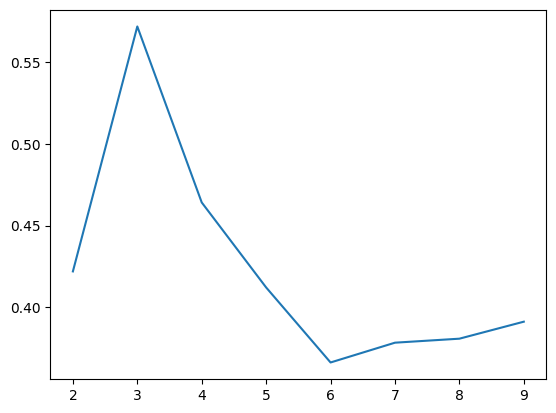

In [186]:
sns.lineplot(x=range (2,10),y=sill_l)
#plt.vlines(x=3,ymin=0.4,ymax=0.53,colors="red",linestyles="dashed",alpha=0.3);

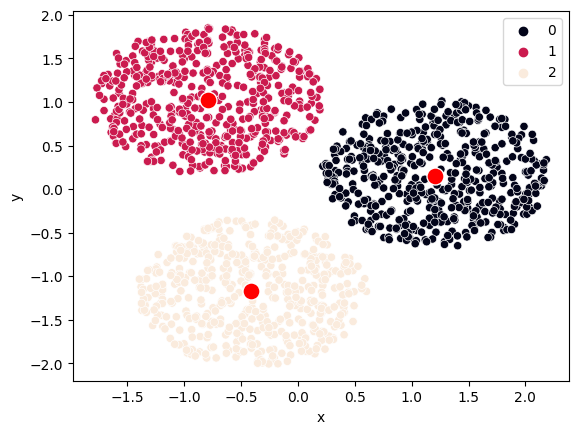

In [188]:
sns.scatterplot(data=scaled_p_df,x="x",y="y",hue="cluster_3",palette="rocket")
sns.scatterplot(data=centroid_l[1], x='x', y='y', color='red',s=150);

<AxesSubplot:xlabel='x', ylabel='y'>

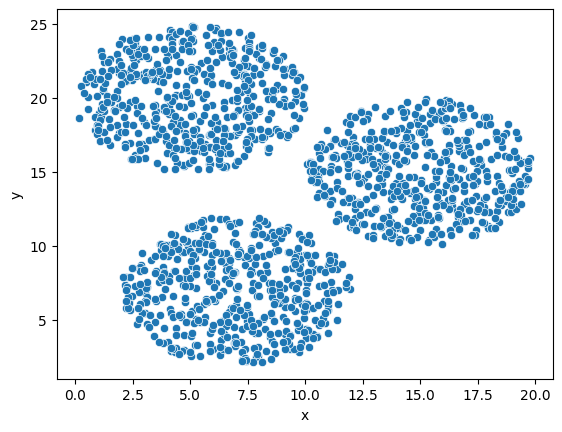

In [190]:
sns.scatterplot(data=test_df,x="x",y="y")